In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Project/MCQA/ViMedicalMCQA

/content/drive/MyDrive/Project/MCQA/ViMedicalMCQA


##**1. Preprocessing**

In [ ]:
import pandas as pd

test_data = pd.read_csv("./data/public_test.csv")

In [ ]:
test_data

,id,question,option_1,option_2,option_3,option_4,option_5,option_6
0,level3_1,Hương đang mang thai và lo lắng mình có thể gặ...,A. Tuần 10,B.Tuần 20,C. Tuần 30,D. Tuần 40,NaN,NaN
1,level3_2,Hương đang mang thai tuần thứ 5 và lo lắng mìn...,A. 5 tuần,B. 15 tuần,C. 25 tuần,D. 35 tuần,NaN,NaN
2,level3_5,Có bao nhiêu loại rau tiền đạo biết rằng trong...,A. 2,B.3,C. 4,D. 5,NaN,NaN
3,level3_13,Bệnh nhân Dũng được chuẩn đoán bị viêm gan kéo...,Có,Không,NaN,NaN,NaN,NaN
4,level3_14,Một bệnh nhân bị đau tinh hoàn. Sau khi được h...,A. Nhiễm trùng đường tiết niệu,B.Ung thư tinh hoàn,C. Chấn thương,D. Giãn tĩnh mạch thừng tinh,NaN,NaN
...,...,...,...,...,...,...,...,...
95,level4_4,Tiểu Đường là nữ ca sĩ nổi tiếng ở Trung Quốc....,Viêm họng do viêm amidan,Tiểu đường,Ung thư vòm họng,Trĩ nội,NaN,NaN
96,level4_9,Mai hiện mang thai tháng thứ 9. Có rất nhiều b...,Herpes sinh dục,Lậu,Chlamydia,Giang mai,NaN,NaN
97,level4_27,Ông Biền năm nay 73 tuổi. Trong một bữa cơm gi...,U não,Thiếu mãu não,Tắc mạch máu não,Tai biến mạch máu não,NaN,NaN
98,level4_28,U não là tình trạng các khối u hình thành tron...,Đều là các bệnh nguy hiểm,Đều là ung thư,Nguyên nhân chính xác không thể xác định,Xảy ra nhiều nhất ở người già,NaN,NaN


In [ ]:
test_data.iloc[0]

id                                                   level3_1
question    Hương đang mang thai và lo lắng mình có thể gặ...
option_1                                           A. Tuần 10
option_2                                            B.Tuần 20
option_3                                           C. Tuần 30
option_4                                           D. Tuần 40
option_5                                                  NaN
option_6                                                  NaN
Name: 0, dtype: object

In [ ]:
import os

file_names = []
corpus = []
for file_name in os.listdir('./data/corpus'):
    with open(f'./data/corpus/{file_name}', 'r') as f:
        doc = f.readlines()

    file_names.append(" ".join(file_name.split("-")))
    corpus.append(" ".join(doc))

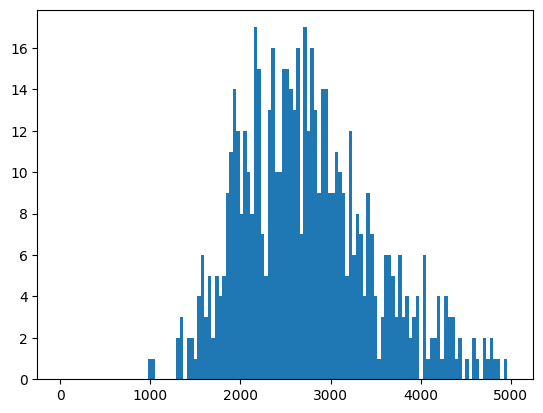

In [ ]:
import matplotlib.pyplot as plt
plt.hist([len(doc.split()) for doc in corpus], bins=128, range=(0, 5000))
plt.show()

**Null**

In [ ]:
corpus[74], corpus[324]

('https://tamanhhospital.vn/truyen-mau-song-thai/\n null',
 'https://tamanhhospital.vn/om-nghen-khi-mang-thai/\n null')

In [ ]:
file_names[0]

'phi dai tuyen tien liet'

In [ ]:
corpus[0]

'https://tamanhhospital.vn/phi-dai-tuyen-tien-liet/\n \n                     Trang chủ > \n CHUYÊN MỤC BỆNH HỌC > \n Tiết niệu > \n Phì đại tuyến tiền liệt: Nguyên nhân, triệu chứng và phòng ngừa\n <h1>Phì đại tuyến tiền liệt: Nguyên nhân, triệu chứng và phòng ngừa</h1>\n Tăng sinh lành tính tuyến tiền liệt hay \n <strong>phì đại tuyến tiền liệt </strong>là bệnh lý phổ biến ở nam giới lớn tuổi. Hiện nay, với sự phát triển của các phương tiện chẩn đoán, người có bệnh được phát hiện nhiều hơn. Trên thế giới có khoảng 60% nam giới ở tuổi 60 bị tăng sinh lành tuyến tiền liệt, tần suất bệnh tăng dần theo tuổi nên số người mắc bệnh ngày càng cao. Bệnh gây ra các triệu chứng rối loạn đi tiểu làm ảnh hưởng đến chất lượng sống.\n <h3>Mục lục</h3>\n Phì đại tuyến tiền liệt là gì?\n Nguyên nhân phì đại tuyến tiền liệt\n Triệu chứng phì đại tuyến tiền liệt\n Chẩn đoán phì đại tuyến tiền liệt\n Các phương pháp điều trị phì đại tuyến tiền liệt\n 1. Phương pháp tự nhiên\n 2. Điều trị bằng thuốc\n 3. 

In [ ]:
file_names[0]

'phi dai tuyen tien liet'

In [ ]:
import re
import string

def remove_url(text):
    return re.sub(r"http\S+", "", text)

def remove_html_tags(text):
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)

codes = ["&#8211", "&#038"]
def remove_special_token(text):
    for code in codes:
        text = text.replace(code, " ")
    return text

def remove_punctation(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, ' ')
    return text

def preprocess_text(text, remove_punc=True):
    if remove_punc:
        return " ".join(remove_punctation(remove_special_token(remove_html_tags(remove_url(text)))).split()).lower()
    else:
        return " ".join(remove_special_token(remove_html_tags(remove_url(text))).split()).lower()

In [ ]:
codes = ["&#8211", "&#038"]
titles = []
for file_name, doc in zip(file_names, corpus):
    raw = doc.split("\n")[5]
    title = doc.split("\n")[5].split(":")[0].split("?")[0]
    for code in codes:
        title = title.replace(code, " ")
    title = preprocess_text(title)
    titles.append(title)

In [ ]:
titles[0]

'phì đại tuyến tiền liệt'

In [ ]:
words = [
    [word for word in preprocess_text(doc).split()]
    for doc in titles
]

In [ ]:
words[0]

['phì', 'đại', 'tuyến', 'tiền', 'liệt']

##**2. Retrieval**

###**Document**

In [ ]:
!pip install rank_bm25

In [ ]:
from rank_bm25 import BM25Okapi

bm25 = BM25Okapi(words)

In [ ]:
test_data.iloc[1]

id                                                   level3_2
question    Hương đang mang thai tuần thứ 5 và lo lắng mìn...
option_1                                            A. 5 tuần
option_2                                           B. 15 tuần
option_3                                           C. 25 tuần
option_4                                           D. 35 tuần
option_5                                                  NaN
option_6                                                  NaN
Name: 1, dtype: object

In [ ]:
index = 1
tokenized_query = preprocess_text(test_data.iloc[index]['question']).split()
tokenized_query

['hương',
 'đang',
 'mang',
 'thai',
 'tuần',
 'thứ',
 '5',
 'và',
 'lo',
 'lắng',
 'mình',
 'có',
 'thể',
 'gặp',
 'phải',
 'rau',
 'tiền',
 'đạo',
 'hương',
 'có',
 'thể',
 'kiểm',
 'tra',
 'phát',
 'hiện',
 'bệnh',
 'này',
 'sau',
 'bao',
 'nhiêu',
 'tuần',
 'nữa']

In [ ]:
indexs = list(range(len(words)))

In [ ]:
bm25.get_top_n(tokenized_query, titles, n=5)

['rau tiền đạo',
 'rau bám mép có nguy hiểm không',
 'không có tinh trùng',
 'viêm mống mắt thể mi',
 'nhau tiền đạo']

In [ ]:
bm25.get_top_n(tokenized_query, indexs, n=5)

[257, 171, 450, 48, 434]

In [ ]:
titles[257]

'rau tiền đạo'

###**Passage**

In [ ]:
def split_doc(doc):
    paragraphs = doc.split("<h3>Mục lục</h3>")[1].split("<h2>")
    menu = paragraphs[0]
    paragraphs = paragraphs[1:]
    process_paragraphs = []
    for paragraph in paragraphs:
        if "hệ thống bệnh viện đa khoa tâm anh" in paragraph.lower():
            process_paragraph = paragraph.lower().split("hệ thống bệnh viện đa khoa tâm anh")[0]
            process_paragraph = paragraph[ : len(process_paragraph)]
        else:
            process_paragraph = paragraph
        process_paragraphs.append(process_paragraph)
    return menu, process_paragraphs

In [ ]:
all_passage = []
for doc in corpus:
    menu, process_paragraphs = split_doc(doc)
    all_passage.extend(process_paragraphs)

In [ ]:
len(all_passage)

4990

In [ ]:
all_passage[0]

'<b>Phì đại tuyến tiền liệt là gì?</b></h2> <strong>Phì đại tuyến tiền liệt</strong> \n là sự tăng sinh lành tính một thực thể mô bệnh lý đặc hiệu gồm sự tăng sinh của mô nền và tế bào niêm mạc tuyến, kết quả là tuyến tiền liệt to ra có thể gây bế tắc đường tiết niệu dưới, khi đó gọi là bướu gây bế tắc. (1)\n  Bệnh gây ra các triệu chứng rối loạn đi tiểu làm ảnh hưởng xấu đến chất lượng sống, tuy không đe dọa tính mạng người bệnh, nhưng rối loạn đi tiểu sẽ diễn tiến nặng dần và phải can thiệp bằng ngoại khoa. \n '

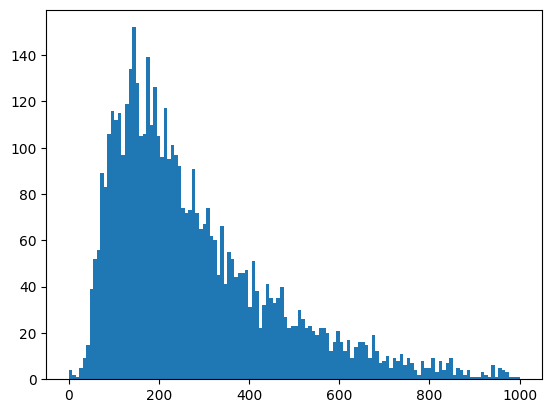

In [ ]:
plt.hist([len(preprocess_text(doc).split()) for doc in all_passage], bins=128, range=(0, 1000))
plt.show()

###**Example**

In [ ]:
index = 1
test_data.iloc[index]

id                                                   level3_2
question    Hương đang mang thai tuần thứ 5 và lo lắng mìn...
option_1                                            A. 5 tuần
option_2                                           B. 15 tuần
option_3                                           C. 25 tuần
option_4                                           D. 35 tuần
option_5                                                  NaN
option_6                                                  NaN
Name: 1, dtype: object

In [ ]:
tokenized_query = preprocess_text(test_data.iloc[index]['question']).split()
print(tokenized_query)

['hương', 'đang', 'mang', 'thai', 'tuần', 'thứ', '5', 'và', 'lo', 'lắng', 'mình', 'có', 'thể', 'gặp', 'phải', 'rau', 'tiền', 'đạo', 'hương', 'có', 'thể', 'kiểm', 'tra', 'phát', 'hiện', 'bệnh', 'này', 'sau', 'bao', 'nhiêu', 'tuần', 'nữa']


In [ ]:
bm25.get_top_n(tokenized_query, titles, n=5)

['rau tiền đạo',
 'rau bám mép có nguy hiểm không',
 'không có tinh trùng',
 'viêm mống mắt thể mi',
 'nhau tiền đạo']

In [ ]:
indexs = list(range(len(words)))

In [ ]:
bm25.get_top_n(tokenized_query, indexs, n=5)

[257, 171, 450, 48, 434]

In [ ]:
corpus[257]

'https://tamanhhospital.vn/rau-tien-dao/\n \n                     Trang chủ > \n CHUYÊN MỤC BỆNH HỌC > \n Sản - Phụ khoa > \n Rau tiền đạo: Nguyên nhân, dấu hiệu và cách phòng ngừa\n <h1>Rau tiền đạo: Nguyên nhân, dấu hiệu và cách phòng ngừa</h1>\n <em><strong>Rau tiền đạo</strong> là một trong những biến chứng thai kỳ nguy hiểm đe dọa tính mạng mẹ bầu và thai nhi với tỷ lệ mắc phải 1/200 trường hợp phụ nữ mang thai. Vậy dấu hiệu rau tiền đạo là gì để mẹ bầu sớm nhận biết và điều trị hiệu quả?</em>  \n <h3>Mục lục</h3>\n Rau tiền đạo là gì?\n Các dạng rau tiền đạo thường gặp\n Nguyên nhân gây ra rau tiền đạo\n Dấu hiệu rau tiền đạo thường gặp\n Rau tiền đạo có nguy hiểm không?\n Đối với thai phụ\n Đối với thai nhi\n  Bao nhiêu tuần thì biết được rau tiền đạo?\n Phương pháp chẩn đoán rau tiền đạo\n Điều trị rau tiền đạo như thế nào?\n Đối với rau tiền đạo khi chưa chuyển dạ\n Đối với rau tiền đạo khi chuyển dạ\n Đối với rau tiền đạo biến chứng rau cài răng lược\n  Phòng ngừa rau tiền đạ

In [ ]:
menu, process_paragraphs = split_doc(corpus[257])

In [ ]:
len(process_paragraphs)

10

In [ ]:
process_paragraphs

['Rau tiền đạo là gì?</h2> <strong>Rau tiền đạo</strong> là hiện tượng rau thai nằm ở vị trí thấp nhất của tử cung, làm che mất một phần hoặc toàn bộ cổ tử cung, làm cản đường ra của thai nhi trong quá trình sinh nở (bệnh còn có tên gọi khác là <strong>nhau tiền đạo</strong>)\n  Trong suốt thời gian mang thai, rau (còn gọi là nhau thai) là bộ phận trao đổi chất duy nhất giữa thai phụ và thai nhi, cung cấp dưỡng chất nuôi dưỡng thai nhi. Bánh rau được hình thành từ rất sớm, song song cùng sự phát triển của thai nhi.\n  PGS.TS.BS Nguyễn Đức Hinh, Trung tâm Sản Phụ khoa Bệnh viện Đa khoa Tâm Anh Hà Nội cho biết, bình thường rau thai bám vào mặt trước, mặt sau hoặc phía trên thành tử cung, bên trái hoặc bên phải của tử cung. \n Bánh rau có hình dạng tròn, đường kính vào khoảng 15cm, dày khoảng 2,5-3cm, cân nặng khoảng 400-500g (ước tính khoảng ⅙ trọng lượng thai nhi). Mỗi bánh rau gồm 15-20 múi, giữa các múi là các rãnh nhỏ. (\n 1)\n ',
 'Các dạng rau tiền đạo thường gặp</h2> Dựa vào vị tr

In [ ]:
process_paragraphs[0]

'Rau tiền đạo là gì?</h2> <strong>Rau tiền đạo</strong> là hiện tượng rau thai nằm ở vị trí thấp nhất của tử cung, làm che mất một phần hoặc toàn bộ cổ tử cung, làm cản đường ra của thai nhi trong quá trình sinh nở (bệnh còn có tên gọi khác là <strong>nhau tiền đạo</strong>)\n  Trong suốt thời gian mang thai, rau (còn gọi là nhau thai) là bộ phận trao đổi chất duy nhất giữa thai phụ và thai nhi, cung cấp dưỡng chất nuôi dưỡng thai nhi. Bánh rau được hình thành từ rất sớm, song song cùng sự phát triển của thai nhi.\n  PGS.TS.BS Nguyễn Đức Hinh, Trung tâm Sản Phụ khoa Bệnh viện Đa khoa Tâm Anh Hà Nội cho biết, bình thường rau thai bám vào mặt trước, mặt sau hoặc phía trên thành tử cung, bên trái hoặc bên phải của tử cung. \n Bánh rau có hình dạng tròn, đường kính vào khoảng 15cm, dày khoảng 2,5-3cm, cân nặng khoảng 400-500g (ước tính khoảng ⅙ trọng lượng thai nhi). Mỗi bánh rau gồm 15-20 múi, giữa các múi là các rãnh nhỏ. (\n 1)\n '

In [ ]:
preprocess_text(process_paragraphs[0], remove_punc=False)

'rau tiền đạo là gì? rau tiền đạo là hiện tượng rau thai nằm ở vị trí thấp nhất của tử cung, làm che mất một phần hoặc toàn bộ cổ tử cung, làm cản đường ra của thai nhi trong quá trình sinh nở (bệnh còn có tên gọi khác là nhau tiền đạo) trong suốt thời gian mang thai, rau (còn gọi là nhau thai) là bộ phận trao đổi chất duy nhất giữa thai phụ và thai nhi, cung cấp dưỡng chất nuôi dưỡng thai nhi. bánh rau được hình thành từ rất sớm, song song cùng sự phát triển của thai nhi. pgs.ts.bs nguyễn đức hinh, trung tâm sản phụ khoa bệnh viện đa khoa tâm anh hà nội cho biết, bình thường rau thai bám vào mặt trước, mặt sau hoặc phía trên thành tử cung, bên trái hoặc bên phải của tử cung. bánh rau có hình dạng tròn, đường kính vào khoảng 15cm, dày khoảng 2,5-3cm, cân nặng khoảng 400-500g (ước tính khoảng ⅙ trọng lượng thai nhi). mỗi bánh rau gồm 15-20 múi, giữa các múi là các rãnh nhỏ. ( 1)'

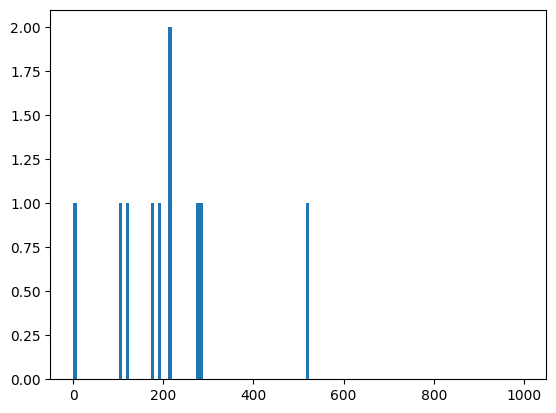

In [ ]:
plt.hist([len(preprocess_text(doc).split()) for doc in process_paragraphs], bins=128, range=(0, 1000))
plt.show()

###**Cosine Similarity**

In [ ]:
!pip install -q transformers sentence_transformers

**vietnamese-sbert** from sentence-transformers

In [ ]:
from sentence_transformers import SentenceTransformer
sentences = ["Cô giáo đang ăn kem", "Chị gái đang thử món thịt dê"]

model = SentenceTransformer('keepitreal/vietnamese-sbert')
embeddings = model.encode(sentences)
print(embeddings)

**xlm-roberta** from transformers

In [ ]:
from transformers import AutoTokenizer, AutoModel
import torch

def mean_pooling(model_output, attention_mask):
    token_embeddings = model_output[0]
    input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
    return torch.sum(token_embeddings * input_mask_expanded, 1) / torch.clamp(input_mask_expanded.sum(1), min=1e-9)

model_name = 'xlm-roberta-base'
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

In [ ]:
def embed_passage(passages, device='cpu'):
    # Tokenize sentences
    encoded_input = tokenizer(passages, padding=True, truncation=True, return_tensors='pt')

    model = model.to(device)
    encoded_input.to(device)
    # Compute token embeddings
    with torch.no_grad():
        model_output = model(**encoded_input)

    # Perform pooling
    passage_embeddings = mean_pooling(model_output, encoded_input['attention_mask'])

    return passage_embeddings

In [ ]:
process_paragraphs = [preprocess_text(doc) for doc in process_paragraphs]

In [ ]:
passage_embeddings = embed_passage(process_paragraphs)

In [ ]:
passage_embeddings

tensor([[-0.0093,  0.0317, -0.0123,  ...,  0.1135,  0.0156,  0.0207],
        [ 0.0118,  0.0396, -0.0334,  ...,  0.0893,  0.0114,  0.0117],
        [ 0.0722,  0.0991,  0.0280,  ..., -0.1468,  0.0114,  0.0396],
        ...,
        [-0.0077,  0.0345, -0.0063,  ...,  0.1003,  0.0246, -0.0170],
        [ 0.0176,  0.0315, -0.0176,  ...,  0.1199,  0.0282, -0.0457],
        [-0.0043,  0.0222, -0.0250,  ...,  0.0920,  0.0365, -0.0248]])

In [ ]:
preprocess_text(test_data.iloc[index]['question'])

'hương đang mang thai tuần thứ 5 và lo lắng mình có thể gặp phải rau tiền đạo hương có thể kiểm tra phát hiện bệnh này sau bao nhiêu tuần nữa'

In [ ]:
test_data.iloc[index]

id                                                   level3_2
question    Hương đang mang thai tuần thứ 5 và lo lắng mìn...
option_1                                            A. 5 tuần
option_2                                           B. 15 tuần
option_3                                           C. 25 tuần
option_4                                           D. 35 tuần
option_5                                                  NaN
option_6                                                  NaN
Name: 1, dtype: object

In [ ]:
question_embedding = embed_passage([preprocess_text(test_data.iloc[index]['question'])])

In [ ]:
question_embedding

In [ ]:
from sentence_transformers import util

In [ ]:
top_k = 2
cos_scores = util.cos_sim(question_embedding, passage_embeddings)[0]
top_results = torch.topk(cos_scores, k=top_k)

In [ ]:
top_results.indices

tensor([7, 6])

In [ ]:
process_paragraphs[6]

'bao nhiêu tuần thì biết được rau tiền đạo bác sĩ nguyễn đức hinh cho biết hầu hết các trường hợp rau tiền đạo có thể được phát hiện sớm từ tuần 20 của thai kỳ nhờ vào phương pháp siêu âm thai trong quá trình siêu âm với sự hỗ trợ của nhiều thiết bị hiện đại bác sĩ có thể quan sát được bánh rau bám vào vị trí nào ở tử cung thân đáy mặt trước mặt sau bên trái bên phải bám thấp bán trung tâm hoặc trung tâm chẩn đoán rau tiền đạo chủ yếu được thực hiện bằng phương pháp siêu âm “khi mang thai nếu không may thai phụ bị rau quấn tiền đạo sẽ rất nguy hiểm đến sức khỏe của mẹ và bé trong thai kỳ chính vì thế thai phụ cần tuân thủ chặt chẽ lịch khám thai của bác sĩ để phát hiện sớm những bất thường trong thai kỳ có can thiệp kịp thời và hiệu quả” bác sĩ nguyễn đức hinh nhấn mạnh'

In [ ]:
process_paragraphs[7]

'phương pháp chẩn đoán rau tiền đạo thông thường việc chẩn đoán được thực hiện bằng phương pháp siêu âm ngoài ra siêu âm cũng có ý nghĩa quan trọng trong chẩn đoán rau tiền đạo biến chứng rau cài răng lược 4 hình ảnh siêu âm sẽ cho thấy khoảng cách giữa bánh rau và thành bàng quang bị thu hẹp lại mạch máu xuyên qua thành cơ tử cung đến thành bàng quang phổ biến trên siêu âm doppler do đó siêu âm được khuyến cáo thực hiện từ sau tuần thai thứ 28 để phát hiện sớm biến chứng này'

##**3. Test Set**

In [3]:
!pip install transformers sentence-transformers rank_bm25

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 58.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 12.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 30.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 79.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 70.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 74.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 35.8 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=4c4da164dc44170b4fb48036e04bdb5dbb31c506d04cf4e0d78729502b6c8fe5
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers


In [4]:
# Read data
import os
import pandas as pd

corpus = []
for file_name in os.listdir('./data/corpus'):
    with open(f'./data/corpus/{file_name}', 'r') as f:
        doc = f.readlines()
    corpus.append(" ".join(doc))

test_data = pd.read_csv("./data/public_test.csv")

In [5]:
import re
import string

def remove_url(text):
    return re.sub(r"http\S+", "", text)

def remove_html_tags(text):
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)

codes = ["&#8211", "&#038"]
def remove_special_token(text):
    for code in codes:
        text = text.replace(code, " ")
    return text

def remove_punctation(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, ' ')
    return text

def preprocess_text(text, remove_punc=True, is_lower=True):
    if remove_punc:
        text = " ".join(remove_punctation(remove_special_token(remove_html_tags(remove_url(text)))).split())
    else:
        text = " ".join(remove_special_token(remove_html_tags(remove_url(text))).split())
    if is_lower:
        return text.lower()
    else:
        return text

In [6]:
# Get title (or title + sub_title (menu))
codes = ["&#8211", "&#038"]
def get_titles(corpus):
    titles = []
    for doc in corpus:
        raw = doc.split("\n")[5]
        title = doc.split("\n")[5].split(":")[0].split("?")[0]
        for code in codes:
            title = title.replace(code, " ")
        title = preprocess_text(title)
        titles.append(title)
    return titles

titles = get_titles(corpus)

In [7]:
# Build BM25 searcher
from rank_bm25 import BM25Okapi

words = [
    [word for word in preprocess_text(doc).split()]
    for doc in titles
]
indexes = list(range(len(words)))

bm25 = BM25Okapi(words)

def bm25_searcher(question, corpus, bm25, indexes, top_k=1):
    tokenized_query = preprocess_text(question).split()
    top_indexs = bm25.get_top_n(tokenized_query, indexes, n=top_k)

    top_docs = []
    for top_index in top_indexs:
        top_docs.append(corpus[top_index])

    return top_docs

In [ ]:
test_data.iloc[0]['question']

'Hương đang mang thai và lo lắng mình có thể gặp phải rau tiền đạo. Hương có thể kiểm tra phát hiện bệnh này từ tuần thứ mấy của thai kỳ?'

In [8]:
question = "Đâu là triệu chứng của bệnh van tim?" # test_data.iloc[0]['question']
top_docs = bm25_searcher(question, corpus, bm25, indexes, top_k=1)

In [9]:
# Get top passage
from sentence_transformers import SentenceTransformer, util

def split_doc(doc):
    paragraphs = doc.split("<h3>Mục lục</h3>")[1].split("<h2>")
    menu = paragraphs[0]
    paragraphs = paragraphs[1:]
    process_paragraphs = []
    for paragraph in paragraphs:
        if "hệ thống bệnh viện đa khoa tâm anh" in paragraph.lower():
            process_paragraph = paragraph.lower().split("hệ thống bệnh viện đa khoa tâm anh")[0]
            process_paragraph = paragraph[ : len(process_paragraph)]
        else:
            process_paragraph = paragraph
        process_paragraphs.append(process_paragraph)
    return menu, process_paragraphs

def mean_pooling(model_output, attention_mask):
    token_embeddings = model_output[0]
    input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
    return torch.sum(token_embeddings * input_mask_expanded, 1) / torch.clamp(input_mask_expanded.sum(1), min=1e-9)

def embed_passage(passages, tokenizer, model, device='cpu'):
    # Tokenize sentences
    encoded_input = tokenizer(passages, padding=True, truncation=True, return_tensors='pt')

    model = model.to(device)
    encoded_input.to(device)
    # Compute token embeddings
    with torch.no_grad():
        model_output = model(**encoded_input)

    # Perform pooling
    passage_embeddings = mean_pooling(model_output, encoded_input['attention_mask'])

    return passage_embeddings

def get_top_passage(question, top_docs, tokenizer, model, top_p=2, device='cpu'):
    all_passage = []
    for doc in top_docs:
        menu, process_paragraphs = split_doc(doc)
        all_passage.extend(process_paragraphs)

    process_paragraphs = [preprocess_text(doc) for doc in all_passage]
    passage_embeddings = embed_passage(process_paragraphs, tokenizer, model, device)

    question_embedding = embed_passage([question], tokenizer, model, device)

    cos_scores = util.cos_sim(question_embedding, passage_embeddings)[0]
    top_results = torch.topk(cos_scores, k=top_p)

    top_passages = []
    for index in top_results.indices:
        top_passages.append(all_passage[index])

    return top_passages

In [10]:
from transformers import AutoTokenizer, AutoModel
import torch

model_name = 'xlm-roberta-base'
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

In [11]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [12]:
top_docs

['https://tamanhhospital.vn/benh-van-tim/\n \n                     Trang chủ > \n CHUYÊN MỤC BỆNH HỌC > \n Tim mạch > \n Bệnh van tim: Nguyên nhân, triệu chứng và phương pháp điều trị\n <h1>Bệnh van tim: Nguyên nhân, triệu chứng và phương pháp điều trị</h1>\n <strong>Bệnh van tim</strong> là tình trạng một hoặc nhiều van tim bị ảnh hưởng chức năng hoạt động, khiến việc lưu thông máu không thể diễn ra như bình thường. Nếu không được điều trị, bệnh có thể làm giảm chất lượng cuộc sống và đe dọa tính mạng bệnh nhân. \n Hình ảnh van 2 lá khỏe mạnh và van 2 lá bị hẹp \n <h3>Mục lục</h3>\n Bệnh van tim là gì?\n Các loại bệnh van tim thường gặp\n Nguyên nhân gây bệnh van tim\n Yếu tố nguy cơ của bệnh\n Các triệu chứng của bệnh van tim\n Biến chứng của bệnh van tim\n Các bệnh lý van tim được chẩn đoán như thế nào?\n Bệnh van tim được điều trị như thế nào?\n 1. Dùng thuốc\n 2. Thủ thuật nong van tim\n 3. Phẫu thuật sửa van tim\n 4. Phẫu thuật thay van tim\n  Lưu ý đối với người bệnh van tim\n L

In [15]:
top_passages = get_top_passage(question, top_docs, tokenizer, model, top_p=5, device=device)

In [21]:
top_passages

['<b>Biến chứng của bệnh van tim</b></h2> Khi van tim bị tổn thương, tim phải làm việc nhiều hơn để bơm đủ số lượng máu mà cơ thể cần. Khi đó, cơ tim có thể dày lên hoặc giãn ra làm cho tim to ra. Điều này kéo dài lâu ngày làm giảm khả năng co bóp của tim và dẫn đến suy tim, loạn nhịp tim.\n  <blockquote><strong>Tham khảo: Bệnh cơ tim giãn nở là gì?</strong>\n </blockquote> Ngoài ra, bệnh còn làm máu bị ứ lại tại tim, tăng nguy cơ hình thành cục máu đông gây tắc mạch, <strong>đột quỵ</strong>, thậm chí tử vong.\n ',
 '<b>Bệnh van tim là gì?</b></h2> <strong>Bệnh van tim</strong> là tình trạng có thể xuất hiện ngay từ khi mới sinh (bẩm sinh) hoặc xảy ra ở người trưởng thành do nhiều nguyên nhân khác nhau, chẳng hạn như tình trạng nhiễm trùng và các bệnh tim mạch khác.\n  Các van tim (gồm van 2 lá, van 3 lá, van động mạch phổi và van động mạch chủ) nằm ở lối ra của 4 buồng tim, có nhiệm vụ duy trì dòng máu một chiều qua tim. Bốn van tim đảm bảo rằng máu luôn chảy tự do theo hướng thuận v

In [22]:
preprocess_text(" ".join(top_passages), False, False)

'Biến chứng của bệnh van tim Khi van tim bị tổn thương, tim phải làm việc nhiều hơn để bơm đủ số lượng máu mà cơ thể cần. Khi đó, cơ tim có thể dày lên hoặc giãn ra làm cho tim to ra. Điều này kéo dài lâu ngày làm giảm khả năng co bóp của tim và dẫn đến suy tim, loạn nhịp tim. Tham khảo: Bệnh cơ tim giãn nở là gì? Ngoài ra, bệnh còn làm máu bị ứ lại tại tim, tăng nguy cơ hình thành cục máu đông gây tắc mạch, đột quỵ, thậm chí tử vong. Bệnh van tim là gì? Bệnh van tim là tình trạng có thể xuất hiện ngay từ khi mới sinh (bẩm sinh) hoặc xảy ra ở người trưởng thành do nhiều nguyên nhân khác nhau, chẳng hạn như tình trạng nhiễm trùng và các bệnh tim mạch khác. Các van tim (gồm van 2 lá, van 3 lá, van động mạch phổi và van động mạch chủ) nằm ở lối ra của 4 buồng tim, có nhiệm vụ duy trì dòng máu một chiều qua tim. Bốn van tim đảm bảo rằng máu luôn chảy tự do theo hướng thuận và không rò rỉ theo chiều ngược lại. (1) Mỗi van tim có các cánh (lá van) mở và đóng một lần trong mỗi nhịp tim. Nếu m

**Test set**

In [ ]:
titles = get_titles(corpus)
words = [
    [word for word in preprocess_text(doc).split()]
    for doc in titles
]
indexes = list(range(len(words)))

bm25 = BM25Okapi(words)

model_name = 'xlm-roberta-base'
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
test_data

,id,question,option_1,option_2,option_3,option_4,option_5,option_6
0,level3_1,Hương đang mang thai và lo lắng mình có thể gặ...,A. Tuần 10,B.Tuần 20,C. Tuần 30,D. Tuần 40,NaN,NaN
1,level3_2,Hương đang mang thai tuần thứ 5 và lo lắng mìn...,A. 5 tuần,B. 15 tuần,C. 25 tuần,D. 35 tuần,NaN,NaN
2,level3_5,Có bao nhiêu loại rau tiền đạo biết rằng trong...,A. 2,B.3,C. 4,D. 5,NaN,NaN
3,level3_13,Bệnh nhân Dũng được chuẩn đoán bị viêm gan kéo...,Có,Không,NaN,NaN,NaN,NaN
4,level3_14,Một bệnh nhân bị đau tinh hoàn. Sau khi được h...,A. Nhiễm trùng đường tiết niệu,B.Ung thư tinh hoàn,C. Chấn thương,D. Giãn tĩnh mạch thừng tinh,NaN,NaN
...,...,...,...,...,...,...,...,...
95,level4_4,Tiểu Đường là nữ ca sĩ nổi tiếng ở Trung Quốc....,Viêm họng do viêm amidan,Tiểu đường,Ung thư vòm họng,Trĩ nội,NaN,NaN
96,level4_9,Mai hiện mang thai tháng thứ 9. Có rất nhiều b...,Herpes sinh dục,Lậu,Chlamydia,Giang mai,NaN,NaN
97,level4_27,Ông Biền năm nay 73 tuổi. Trong một bữa cơm gi...,U não,Thiếu mãu não,Tắc mạch máu não,Tai biến mạch máu não,NaN,NaN
98,level4_28,U não là tình trạng các khối u hình thành tron...,Đều là các bệnh nguy hiểm,Đều là ung thư,Nguyên nhân chính xác không thể xác định,Xảy ra nhiều nhất ở người già,NaN,NaN


In [ ]:
passages = []
top_doc = 1
top_passage = 2

for idx, row in test_data.iterrows():
    question = row['question']
    question = preprocess_text(question)
    top_docs = bm25_searcher(question, corpus, bm25, indexes, top_k=top_doc)
    top_passages = get_top_passage(question, top_docs, tokenizer, model, top_p=top_passage, device=device)
    passages.append(" /// ".join(top_passages))

In [ ]:
process_passages = [preprocess_text(passage, False, False) for passage in passages]

In [ ]:
process_passages[0]

'Phương pháp chẩn đoán rau tiền đạo Thông thường, việc chẩn đoán được thực hiện bằng phương pháp siêu âm. Ngoài ra, siêu âm cũng có ý nghĩa quan trọng trong chẩn đoán rau tiền đạo biến chứng rau cài răng lược. (4) Hình ảnh siêu âm sẽ cho thấy khoảng cách giữa bánh rau và thành bàng quang bị thu hẹp lại, mạch máu xuyên qua thành cơ tử cung đến thành bàng quang phổ biến trên siêu âm Doppler. Do đó, siêu âm được khuyến cáo thực hiện từ sau tuần thai thứ 28 để phát hiện sớm biến chứng này. /// Bao nhiêu tuần thì biết được rau tiền đạo? Bác sĩ Nguyễn Đức Hinh cho biết, hầu hết các trường hợp rau tiền đạo có thể được phát hiện sớm từ tuần 20 của thai kỳ nhờ vào phương pháp siêu âm thai. Trong quá trình siêu âm, với sự hỗ trợ của nhiều thiết bị hiện đại, bác sĩ có thể quan sát được bánh rau bám vào vị trí nào ở tử cung (thân, đáy, mặt trước, mặt sau, bên trái, bên phải, bám thấp, bán trung tâm hoặc trung tâm). Chẩn đoán rau tiền đạo chủ yếu được thực hiện bằng phương pháp siêu âm “Khi mang th

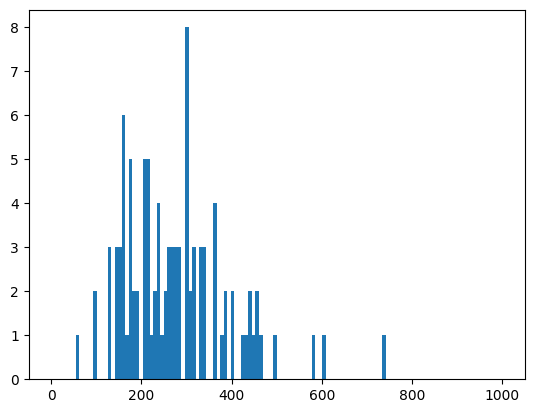

In [ ]:
import matplotlib.pyplot as plt
plt.hist([len(doc.split()) for doc in process_passages], bins=128, range=(0, 1000))
plt.show()

In [ ]:
test_data["context"] = process_passages

In [ ]:
test_data

,id,question,option_1,option_2,option_3,option_4,option_5,option_6,context
0,level3_1,Hương đang mang thai và lo lắng mình có thể gặ...,A. Tuần 10,B.Tuần 20,C. Tuần 30,D. Tuần 40,NaN,NaN,Phương pháp chẩn đoán rau tiền đạo Thông thườn...
1,level3_2,Hương đang mang thai tuần thứ 5 và lo lắng mìn...,A. 5 tuần,B. 15 tuần,C. 25 tuần,D. 35 tuần,NaN,NaN,Phương pháp chẩn đoán rau tiền đạo Thông thườn...
2,level3_5,Có bao nhiêu loại rau tiền đạo biết rằng trong...,A. 2,B.3,C. 4,D. 5,NaN,NaN,Phương pháp chẩn đoán rau tiền đạo Thông thườn...
3,level3_13,Bệnh nhân Dũng được chuẩn đoán bị viêm gan kéo...,Có,Không,NaN,NaN,NaN,NaN,Nguyên nhân gây bệnh quai bị Quai bị có mặt tr...
4,level3_14,Một bệnh nhân bị đau tinh hoàn. Sau khi được h...,A. Nhiễm trùng đường tiết niệu,B.Ung thư tinh hoàn,C. Chấn thương,D. Giãn tĩnh mạch thừng tinh,NaN,NaN,Bị đau tinh hoàn bên phải nguy hiểm như thế nà...
...,...,...,...,...,...,...,...,...,...
95,level4_4,Tiểu Đường là nữ ca sĩ nổi tiếng ở Trung Quốc....,Viêm họng do viêm amidan,Tiểu đường,Ung thư vòm họng,Trĩ nội,NaN,NaN,Võng mạc tiểu đường là gì? Bệnh võng mạc tiểu ...
96,level4_9,Mai hiện mang thai tháng thứ 9. Có rất nhiều b...,Herpes sinh dục,Lậu,Chlamydia,Giang mai,NaN,NaN,Phương pháp chẩn đoán cơn nghén BS.CKI Hồ Thị ...
97,level4_27,Ông Biền năm nay 73 tuổi. Trong một bữa cơm gi...,U não,Thiếu mãu não,Tắc mạch máu não,Tai biến mạch máu não,NaN,NaN,Nghe kém một bên tai là gì? Nghe kém một bên t...
98,level4_28,U não là tình trạng các khối u hình thành tron...,Đều là các bệnh nguy hiểm,Đều là ung thư,Nguyên nhân chính xác không thể xác định,Xảy ra nhiều nhất ở người già,NaN,NaN,U não lành tính là gì? U não lành tính là một ...


In [ ]:
test_data.to_csv('./data/public_test_with_context.csv', index=False)

##**4. Translate to English**

In [ ]:
!pip install deep_translator

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 1.0 MB/s eta 0:00:00


In [ ]:
from deep_translator import GoogleTranslator

translator = GoogleTranslator(source='vi', target='en')

In [ ]:
def translate_text(text):
    if isinstance(text, str):
        translated_text = translator.translate(text)
        return translated_text
    else:
        return ''

In [ ]:
translate_text(test_data['context'][0])

'Method of diagnosing placenta praevia Usually, the diagnosis is made by ultrasound. In addition, ultrasound is also important in diagnosing placenta previa, complications of placenta accreta. (4) Ultrasound images will show that the distance between the placenta and the bladder wall is narrowed, blood vessels passing through the uterine muscle wall to the bladder wall are common on Doppler ultrasound. Therefore, ultrasound is recommended to be performed after the 28th week of pregnancy to detect this complication early. /// How many weeks will it take to know placenta praevia? Doctor Nguyen Duc Hinh said that most cases of placenta previa can be detected as early as the 20th week of pregnancy thanks to fetal ultrasound. During the ultrasound process, with the support of many modern equipment, the doctor can observe where in the uterus the placenta is attached (body, fundus, front, back, left, right). , low grip, semi-central or central). Diagnosis of placenta previa is mainly done by 

In [ ]:
translate_text(test_data['option_5'][0])

''

In [ ]:
from tqdm import tqdm

en_test_data = []
for idx, row in tqdm(test_data.iterrows()):
    id = row['id']
    question = translate_text(row['question'])
    option_1 = translate_text(row['option_1'])
    option_2 = translate_text(row['option_2'])
    option_3 = translate_text(row['option_3'])
    option_4 = translate_text(row['option_4'])
    option_5 = translate_text(row['option_5'])
    option_6 = translate_text(row['option_6'])
    context = translate_text(row['context'])
    data = {
        'id': id,
        'question': question,
        'option_1': option_1,
        'option_2': option_2,
        'option_3': option_3,
        'option_4': option_4,
        'option_5': option_5,
        'option_6': option_6,
        'context': context,
    }
    en_test_data.append(data)

100it [07:27,  4.48s/it]


In [ ]:
en_test_df = pd.DataFrame(en_test_data)

In [ ]:
en_test_df

,id,question,option_1,option_2,option_3,option_4,option_5,option_6,context
0,level3_1,Huong is pregnant and worried she may have pla...,A. Week 10,B.Week 20,C. Week 30,D. Week 40,,,"Method of diagnosing placenta praevia Usually,..."
1,level3_2,Huong is 5 weeks pregnant and is worried she m...,A. 5 weeks,B. 15 weeks,C. 25 weeks,D. 35 weeks,,,"Method of diagnosing placenta praevia Usually,..."
2,level3_5,"How many strikers know that in football, each ...",A. 2,B.3,C. 4,D. 5,,,"Method of diagnosing placenta praevia Usually,..."
3,level3_13,Patient Dung was diagnosed with hepatitis last...,Have,Are not,,,,,Causes of mumps Mumps is present worldwide and...
4,level3_14,A patient has testicular pain. After being que...,A. Urinary tract infection,B. Testicular cancer,C. Trauma,D. Varicocele,,,How dangerous is right testicle pain? Most cas...
...,...,...,...,...,...,...,...,...,...
95,level4_4,Xiao Tang is a famous female singer in China. ...,Sore throat due to tonsillitis,Diabetes,Nasopharyngeal cancer,Internal hemorrhoids,,,What is diabetic retinopathy? Diabetic retinop...
96,level4_9,Mai is currently 9 months pregnant. There are ...,Genital herpes,Gonorrhea,Chlamydia,Syphilis,,,Method for diagnosing morning sickness. Doctor...
97,level4_27,Mr. Bien is 73 years old this year. During a f...,Brain tumors,Lack of brain,Cerebral vascular occlusion,Stroke,,,What is hearing loss in one ear? Unilateral he...
98,level4_28,Brain tumor is a condition in which tumors for...,These are all dangerous diseases,It's all cancer,The exact cause cannot be determined,Occurs most often in the elderly,,,What is a benign brain tumor? A benign brain t...


In [ ]:
en_test_df.to_csv('./data/public_test_with_context_en.csv', index=False)